In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [2]:
df_dt = pd.read_csv('decision_tree.csv')
df_dt.sort_values(by=['weight'],ascending= False,inplace = True)
df_dt.reset_index(drop=True, inplace=True)
df_dt.head()
dt_vars=list(df_dt['features'][0:25].values)
dt_vars

['51277_var',
 '50878_min',
 '51256_max',
 '51301_min',
 '51265_mean',
 '50804_max',
 '50971_max',
 '50931_max',
 '50983_min',
 '50931_min',
 '51265_max',
 '51250_var',
 '51237_min',
 '51244_min',
 '50912_min',
 '51248_min',
 '51221_min',
 '51249_min',
 '51006_min',
 '51250_min',
 '50971_min',
 '50970_min',
 '51254_min',
 '50960_min',
 '51222_min']

In [3]:
df_rg = pd.read_csv('regression.csv')
df_rg['weight'] = np.abs(df_rg['weight'])
df_rg.sort_values(by=['weight'],ascending= False,inplace = True)
df_rg.reset_index(drop=True, inplace=True)
df_rg.head()
rg_vars=list(df_rg['features'][0:25].values)
rg_vars

['urea_n_min',
 '51006_min',
 '50971_max',
 '51006_max',
 'urea_n_max',
 '50882_max',
 '51491_min',
 '50902_max',
 '50912_var',
 'gender_F',
 'gender_M',
 '50868_mean',
 'sofa',
 '51249_mean',
 'temp_max',
 '50971_var',
 '51006_mean',
 '50970_var',
 '50893_max',
 'temp_min',
 '51222_min',
 'marital_status_SINGLE',
 '51237_max',
 '50902_min',
 'temp_mean']

In [4]:
df_rf = pd.read_csv('randomForest.csv')
df_rf.sort_values(by=['weight'],ascending= False,inplace = True)
df_rf.head()
rf_vars=list(df_rf['features'][0:25].values)
rf_vars

['51250_var',
 '51277_var',
 '51222_min',
 '50861_min',
 '50902_min',
 '51265_var',
 '50971_max',
 '51248_var',
 '51249_min',
 '50878_min',
 '51256_max',
 '50813_min',
 '51279_min',
 '50893_max',
 '50983_max',
 '50882_var',
 '51277_mean',
 '51265_max',
 '51244_max',
 '50971_min',
 '50983_min',
 '51279_max',
 '51254_min',
 '51006_var',
 '51248_max']

In [5]:
all_vars = dt_vars+rg_vars+rf_vars
all_vars_unq = np.unique(all_vars)

In [6]:
combine=[]
for v in all_vars_unq:
    temp=[]
    temp.append(v)
    if v in dt_vars:
        temp.append(1)
    else: 
        temp.append(0)
        
    if v in rg_vars:
        temp.append(1)
    else: 
        temp.append(0)
        
    if v in rf_vars:
        temp.append(1)
    else: 
        temp.append(0)
    
    combine.append(temp)

In [7]:
df_combine = pd.DataFrame(combine)
df_combine.columns = ['variables','dec_tree','regr','rand_for']
df_combine['sum']=df_combine['dec_tree']+df_combine['regr']+df_combine['rand_for']
df_combine.sort_values(by=['sum'],ascending= False,inplace = True)
df_combine.reset_index(drop=True, inplace=True)

In [8]:
df_combine

,variables,dec_tree,regr,rand_for,sum
0,51222_min,1,1,1,3
1,50971_max,1,1,1,3
2,50902_min,0,1,1,2
3,50983_min,1,0,1,2
4,51006_min,1,1,0,2
5,51265_max,1,0,1,2
6,51256_max,1,0,1,2
7,51277_var,1,0,1,2
8,50971_min,1,0,1,2
9,50893_max,0,1,1,2


In [9]:
df_name = pd.read_csv('mimic_data/D_LABITEMS.csv')
df_name = df_name.iloc[:,1:5]
df_name.head()

,ITEMID,LABEL,FLUID,CATEGORY
0,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology
1,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology
2,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology
3,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology
4,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology


In [10]:
label=[]
for indx,row in df_combine.iterrows():
    var = row['variables']

    if var.split('_')[0].isdigit():
        var_num= int(var.split('_')[0])
        var_new = df_name[df_name['ITEMID']==var_num]['LABEL']
        label.append(var_new.values[0])
    else:
        label.append(var)

In [11]:
df_combine['label']=label

In [12]:
df_combine.to_csv('final_report.csv',index=False)

In [13]:
df_combine

,variables,dec_tree,regr,rand_for,sum,label
0,51222_min,1,1,1,3,Hemoglobin
1,50971_max,1,1,1,3,Potassium
2,50902_min,0,1,1,2,Chloride
3,50983_min,1,0,1,2,Sodium
4,51006_min,1,1,0,2,Urea Nitrogen
5,51265_max,1,0,1,2,Platelet Count
6,51256_max,1,0,1,2,Neutrophils
7,51277_var,1,0,1,2,RDW
8,50971_min,1,0,1,2,Potassium
9,50893_max,0,1,1,2,"Calcium, Total"


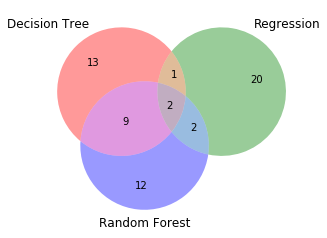

Total: 59


In [14]:
# Custom text labels: change the label of group A
countDTonly= countRonly=countRFonly = 0
countDT_R=countDT_RF=countR_RF=countall=0

for indx,row in df_combine.iterrows():
    temp = row['sum']
    if (temp == 3):
        countall = countall+1
    elif (temp == 2):
        if (row['dec_tree'] == 1 and row ['regr']==1):
            countDT_R= countDT_R+1
        elif (row['dec_tree'] == 1 and row ['rand_for']==1):
            countDT_RF= countDT_RF+1
        elif (row['regr'] == 1 and row ['rand_for']==1):
            countR_RF= countR_RF+1
    elif (temp == 1): 
        if (row['dec_tree'] == 1):
            countDTonly= countDTonly+1
        elif (row['regr'] == 1):
            countRonly= countRonly+1
        elif (row['rand_for'] == 1):
            countRFonly= countRFonly+1
        else: print('no values found')
    
v=venn3(subsets = (countDTonly, countRonly, countDT_R, countRFonly,countDT_RF,countR_RF,countall)
        , set_labels = ('Decision Tree', 'Regression', 'Random Forest'))
plt.savefig("features venn diagram.png")
plt.show()


print('Total:',countDTonly+countRonly+countRFonly+countDT_R+countDT_RF+countR_RF+countall)

In [15]:
df_combine.columns

Index(['variables', 'dec_tree', 'regr', 'rand_for', 'sum', 'label'], dtype='object')

In [17]:
df_combine['label'].unique()

array(['Hemoglobin', 'Potassium', 'Chloride', 'Sodium', 'Urea Nitrogen',
       'Platelet Count', 'Neutrophils', 'RDW', 'Calcium, Total',
       'Monocytes', 'MCV', 'Asparate Aminotransferase (AST)', 'MCHC',
       'Calculated Total CO2', 'Red Blood Cells', 'MCH',
       'White Blood Cells', 'pH', 'gender_F', 'gender_M',
       'marital_status_SINGLE', 'sofa', 'temp_max', 'temp_mean',
       'temp_min', 'urea_n_max', 'INR(PT)', 'Phosphate',
       'Alanine Aminotransferase (ALT)', 'Anion Gap', 'Bicarbonate',
       'Creatinine', 'Glucose', 'Magnesium', 'Hematocrit', 'Lactate',
       'Lymphocytes', 'urea_n_min'], dtype=object)